In [1]:
import numpy as np
import pandas as pd

# BASIC data structures

## Series

In [3]:
d = {'a' : 1, 'b' : 2, 'c' : 3}
ser = pd.Series(data = d, index = ['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [4]:
ser2 = pd.Series(data = d, index = ['x', 'y', 'z'])
ser2

x   NaN
y   NaN
z   NaN
dtype: float64

In [5]:
r = [1, 2]
ser3 = pd.Series(r, copy=False)
ser3.iloc[0] = 999

print(r)
print(ser3)

[1, 2]
0    999
1      2
dtype: int64


In [7]:
r1 = np.array([1, 2])
ser4 = pd.Series(r1, copy=False)
ser4.iloc[0] = 999

print(r1)
print(ser4)

[999   2]
0    999
1      2
dtype: int32


## DataFrame

In [8]:
d = {'col1' : [1, 2], 'col2' : [3, 4]}
df = pd.DataFrame(data = d)
df

,col1,col2
0,1,3
1,2,4


In [9]:
df.dtypes

col1    int64
col2    int64
dtype: object

In [11]:
df2 = pd.DataFrame(data = d, dtype = np.int8)
df2.dtypes

col1    int8
col2    int8
dtype: object

In [12]:
d2 = {'col1' : [0, 1, 2, 3], 'col2' : pd.Series([2, 3], index = [2, 3])}
pd.DataFrame(data = d2, index = [0, 1, 2, 3])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


In [14]:
df3 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns = ['a', 'b', 'c'])
df3

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [15]:
data = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)],
                dtype = [('a', 'i4'), ('b', 'i4'), ('c', 'i4')])
df4 = pd.DataFrame(data, columns = ['c', 'a'])
df4

,c,a
0,3,1
1,6,4
2,9,7


In [16]:
from dataclasses import make_dataclass

Point = make_dataclass("Point", [('x', int), ('y', int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [17]:
ser = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
df = pd.DataFrame(data = ser, index = ['a', 'c'])
df

,0
a,1
c,3


In [18]:
df1 = pd.DataFrame([1, 2, 3], index = ['a', 'b', 'c'], columns = ['x'])
df2 = pd.DataFrame(data = df1, index = ['a', 'c'])
df2

,x
a,1
c,3


# Object creation

In [19]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## rangeindex

In [20]:
list(pd.RangeIndex(5))

[0, 1, 2, 3, 4]

In [21]:
list(pd.RangeIndex(-2, 4))

[-2, -1, 0, 1, 2, 3]

In [22]:
list(pd.RangeIndex(0, 10, 2))

[0, 2, 4, 6, 8]

In [23]:
list(pd.RangeIndex(2, -10, -3))

[2, -1, -4, -7]

In [24]:
list(pd.RangeIndex(0))

[]

In [25]:
list(pd.RangeIndex(1, 0))

[]

In [26]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [27]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.230881,0.134413,1.233933,-1.210917
2013-01-02,-0.215589,0.294820,-1.474676,-1.551154
2013-01-03,-0.242813,1.289564,-0.238682,0.075041
2013-01-04,-0.339360,1.403973,0.955863,-0.944043
2013-01-05,1.602683,-0.062749,0.858241,0.569788
2013-01-06,0.573662,0.008351,1.732631,1.486931


In [30]:
df2 = pd.DataFrame(
    {'A' : 1.0,
     'B' : pd.Timestamp('20130102'),
     'C' : pd.Series(1, index = list(range(4)), dtype = 'float32'),
     'D' : np.array([3] * 4, dtype = 'int32'),
     'E' : pd.Categorical(['test', 'train', 'test', 'train']),
     'F' : 'foo',
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [31]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

# Viewing data

## head(), tail()

In [33]:
df.head()

,A,B,C,D
2013-01-01,-0.230881,0.134413,1.233933,-1.210917
2013-01-02,-0.215589,0.294820,-1.474676,-1.551154
2013-01-03,-0.242813,1.289564,-0.238682,0.075041
2013-01-04,-0.339360,1.403973,0.955863,-0.944043
2013-01-05,1.602683,-0.062749,0.858241,0.569788


In [36]:
df_dongmul = pd.DataFrame({'animal' : ['alligator', 'bee', 'falcon', 'lion',
                                       'monkey', 'parrot', 'shark', 'whale', 'zebra']})
df_dongmul

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey
5,parrot
6,shark
7,whale
8,zebra


In [37]:
df_dongmul.head()

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey


In [38]:
df_dongmul.head(3)

,animal
0,alligator
1,bee
2,falcon


In [39]:
df_dongmul.head(-3)

,animal
0,alligator
1,bee
2,falcon
3,lion
4,monkey
5,parrot


In [35]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.339360,1.403973,0.955863,-0.944043
2013-01-05,1.602683,-0.062749,0.858241,0.569788
2013-01-06,0.573662,0.008351,1.732631,1.486931


In [40]:
df_dongmul.tail()

,animal
4,monkey
5,parrot
6,shark
7,whale
8,zebra


In [42]:
df_dongmul.tail(3)

,animal
6,shark
7,whale
8,zebra


In [43]:
df_dongmul.tail(-3)

,animal
3,lion
4,monkey
5,parrot
6,shark
7,whale
8,zebra


## index, columns

In [44]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [46]:
df_people = pd.DataFrame({'Name' : ['Alice', 'Bob', 'Aritra'],
                          'Age' : [25, 30, 35],
                          'Location' : ['Seattle', 'New York', 'Kona']},
                         index = ([10, 20, 30]))
df_people.index

Index([10, 20, 30], dtype='int64')

In [47]:
df_people.index = [100, 200, 300]
df_people

,Name,Age,Location
100,Alice,25,Seattle
200,Bob,30,New York
300,Aritra,35,Kona


In [45]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [48]:
df_100 = pd.DataFrame({'A' : [1, 2], 'B' : [3, 4]})
df_100

,A,B
0,1,3
1,2,4


## to_numpy()

In [49]:
df.to_numpy()

array([[-0.23088059,  0.13441346,  1.23393337, -1.21091678],
       [-0.21558893,  0.29482034, -1.47467583, -1.55115361],
       [-0.24281315,  1.28956402, -0.23868173,  0.07504148],
       [-0.33936022,  1.40397267,  0.9558633 , -0.94404265],
       [ 1.60268287, -0.06274937,  0.85824078,  0.56978844],
       [ 0.57366202,  0.00835107,  1.7326309 ,  1.4869313 ]])

In [50]:
df_100.to_numpy()

array([[1, 3],
       [2, 4]], dtype=int64)

In [51]:
df_100['C'] = pd.date_range('2000', periods=2)
df_100.to_numpy()

array([[1, 3, Timestamp('2000-01-01 00:00:00')],
       [2, 4, Timestamp('2000-01-02 00:00:00')]], dtype=object)

In [52]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

## describe()

In [53]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.191284,0.511395,0.511218,-0.262392
std,0.768382,0.659387,1.169481,1.174033
min,-0.339360,-0.062749,-1.474676,-1.551154
25%,-0.239830,0.039867,0.035549,-1.144198
50%,-0.223235,0.214617,0.907052,-0.434501
75%,0.376349,1.040878,1.164416,0.446102
max,1.602683,1.403973,1.732631,1.486931


In [54]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.230881,-0.215589,-0.242813,-0.339360,1.602683,0.573662
B,0.134413,0.294820,1.289564,1.403973,-0.062749,0.008351
C,1.233933,-1.474676,-0.238682,0.955863,0.858241,1.732631
D,-1.210917,-1.551154,0.075041,-0.944043,0.569788,1.486931


In [55]:
s = pd.Series([1, 2, 3])
s.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
dtype: float64

In [56]:
s = pd.Series([
    np.datetime64('2000-01-01'),
    np.datetime64('2010-01-01'),
    np.datetime64('2010-01-01')
])
s.describe()

count                      3
mean     2006-09-01 08:00:00
min      2000-01-01 00:00:00
25%      2004-12-31 12:00:00
50%      2010-01-01 00:00:00
75%      2010-01-01 00:00:00
max      2010-01-01 00:00:00
dtype: object

In [57]:
df_num = pd.DataFrame({'categorical' : pd.Categorical(['d', 'e', 'f']),
                       'numeric' : [1, 2, 3],
                       'object' : ['a', 'b',  'c']
                      })
df_num.describe()

,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [58]:
df_num.describe(include = 'all')

,categorical,numeric,object
count,3,3.0,3
unique,3,NaN,3
top,d,NaN,a
freq,1,NaN,1
mean,NaN,2.0,NaN
std,NaN,1.0,NaN
min,NaN,1.0,NaN
25%,NaN,1.5,NaN
50%,NaN,2.0,NaN
75%,NaN,2.5,NaN


In [59]:
df_num.numeric.describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: numeric, dtype: float64

In [60]:
df_num.describe(exclude = [object])

,categorical,numeric
count,3,3.0
unique,3,NaN
top,d,NaN
freq,1,NaN
mean,NaN,2.0
std,NaN,1.0
min,NaN,1.0
25%,NaN,1.5
50%,NaN,2.0
75%,NaN,2.5


## sort_index
* 인덱스 정렬
    * ascending = True : 오름차순
    * ascending - False : 내림차순

In [61]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2013-01-01,-1.210917,1.233933,0.134413,-0.230881
2013-01-02,-1.551154,-1.474676,0.294820,-0.215589
2013-01-03,0.075041,-0.238682,1.289564,-0.242813
2013-01-04,-0.944043,0.955863,1.403973,-0.339360
2013-01-05,0.569788,0.858241,-0.062749,1.602683
2013-01-06,1.486931,1.732631,0.008351,0.573662


In [63]:
df_a = pd.DataFrame([1, 2, 3, 4, 5], index = [100, 29, 234, 1, 150],
                    columns = ['A'])
df_a.sort_index()

,A
1,4
29,2
100,1
150,5
234,3


In [64]:
df_a.sort_index(ascending = False)

,A
234,3
150,5
100,1
29,2
1,4


In [65]:
df_b = pd.DataFrame({'a' : [1, 2, 3, 4]}, index = ['A', 'b', 'c', 'd'])
df_b.sort_index(key=lambda x : x.str.lower())

,a
A,1
b,2
c,3
d,4


## sort_values
* column을 기준으로 해서 정렬하기

In [66]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-05,1.602683,-0.062749,0.858241,0.569788
2013-01-06,0.573662,0.008351,1.732631,1.486931
2013-01-01,-0.230881,0.134413,1.233933,-1.210917
2013-01-02,-0.215589,0.294820,-1.474676,-1.551154
2013-01-03,-0.242813,1.289564,-0.238682,0.075041
2013-01-04,-0.339360,1.403973,0.955863,-0.944043


In [67]:
df_10 = pd.DataFrame({
    'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2' : [2, 1, 9, 8, 7, 4],
    'col3' : [0, 1, 9, 4, 2, 3],
    'col4' : ['a', 'B', 'c', 'D', 'e', 'F']
})
df_10

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [68]:
df_10.sort_values(by = ['col1'])

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [70]:
df_10.sort_values(by = ['col1', 'col2'])

,col1,col2,col3,col4
1,A,1,1,B
0,A,2,0,a
2,B,9,9,c
5,C,4,3,F
4,D,7,2,e
3,NaN,8,4,D


In [69]:
df_10.sort_values(by = 'col1', ascending = False)

,col1,col2,col3,col4
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B
3,NaN,8,4,D


In [71]:
df_10.sort_values(by = 'col1', ascending = False, na_position='first')

,col1,col2,col3,col4
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F
2,B,9,9,c
0,A,2,0,a
1,A,1,1,B


In [72]:
df_10.sort_values(by = 'col4', key = lambda col : col.str.lower())

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


In [73]:
df_hour = pd.DataFrame({
    'time' : ['Ohr', '128hr', '72hr', '48hr', '96hr'],
    'value' : [10, 20, 30, 40, 50]
})
df_hour

,time,value
0,Ohr,10
1,128hr,20
2,72hr,30
3,48hr,40
4,96hr,50


In [74]:
from natsort import index_natsorted

df_hour.sort_values(
    by = 'time',
    key = lambda x : np.argsort(index_natsorted(df_hour['time']))
)

ModuleNotFoundError: No module named 'natsort'

# Selection

## By Label
* indexing, slicing 이용
    * loc[] : ['행', ['열']]

In [75]:
df['A']

2013-01-01   -0.230881
2013-01-02   -0.215589
2013-01-03   -0.242813
2013-01-04   -0.339360
2013-01-05    1.602683
2013-01-06    0.573662
Freq: D, Name: A, dtype: float64

In [76]:
df[0:3]

,A,B,C,D
2013-01-01,-0.230881,0.134413,1.233933,-1.210917
2013-01-02,-0.215589,0.294820,-1.474676,-1.551154
2013-01-03,-0.242813,1.289564,-0.238682,0.075041


In [79]:
# 행으로 선택하기
df.loc[dates[0]]

A   -0.230881
B    0.134413
C    1.233933
D   -1.210917
Name: 2013-01-01 00:00:00, dtype: float64

In [78]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.230881,0.134413
2013-01-02,-0.215589,0.294820
2013-01-03,-0.242813,1.289564
2013-01-04,-0.339360,1.403973
2013-01-05,1.602683,-0.062749
2013-01-06,0.573662,0.008351


In [80]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.215589,0.294820
2013-01-03,-0.242813,1.289564
2013-01-04,-0.339360,1.403973


In [81]:
df.loc[dates[0], 'A']

-0.23088058614458162

In [82]:
df.at[dates[0], 'A']

-0.23088058614458162

In [83]:
df_ex = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                     index = ['cobra', 'viper', 'sidewinder'],
                     columns = ['max_speed', 'shield'])
df_ex

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [85]:
df_ex.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [87]:
df_ex.loc[['viper', 'sidewinder']]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [89]:
df_ex.loc['cobra', 'shield']

2

In [90]:
df_ex.loc['cobra':'viper', 'max_speed']

cobra    1
viper    4
Name: max_speed, dtype: int64

In [91]:
# 행의 개수만큼 []안 에 boolean 문자를 적는다.
df_ex.loc[[False, False, True]]

,max_speed,shield
sidewinder,7,8


In [92]:
df_ex[pd.Series([False, True, False],
                 index = ['viper', 'sidewinder', 'cobra'])]

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_40660\3444360836.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ex[pd.Series([False, True, False],


,max_speed,shield
sidewinder,7,8


In [94]:
# 인덱스 열의 이름을 정해줌.
df_ex.loc[pd.Index(['cobra', 'viper'], name='foo')]

,max_speed,shield
foo,,
cobra,1,2
viper,4,5


In [96]:
# 조건을 넣어서 확인할 수도 있음.
df_ex.loc[df_ex['shield'] > 6]

,max_speed,shield
sidewinder,7,8


## By position
* iloc['행', '열']

In [97]:
df.iloc[3]

A   -0.339360
B    1.403973
C    0.955863
D   -0.944043
Name: 2013-01-04 00:00:00, dtype: float64

In [98]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.339360,1.403973
2013-01-05,1.602683,-0.062749


In [99]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.215589,-1.474676
2013-01-03,-0.242813,-0.238682
2013-01-05,1.602683,0.858241


In [100]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.215589,0.294820,-1.474676,-1.551154
2013-01-03,-0.242813,1.289564,-0.238682,0.075041


In [101]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.134413,1.233933
2013-01-02,0.294820,-1.474676
2013-01-03,1.289564,-0.238682
2013-01-04,1.403973,0.955863
2013-01-05,-0.062749,0.858241
2013-01-06,0.008351,1.732631


In [102]:
df.iloc[1, 1]

0.2948203362631774

In [103]:
df.iat[1, 1]

0.2948203362631774

## boolean indexing

In [105]:
# 컬럼 A의 값이 0이상인 행 찾기
df[df['A'] > 0]

,A,B,C,D
2013-01-05,1.602683,-0.062749,0.858241,0.569788
2013-01-06,0.573662,0.008351,1.732631,1.486931


In [107]:
# 조건에 맞는 값만 표시하기. 조건에 맞지 않으면 NaN으로 나타남.
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.134413,1.233933,NaN
2013-01-02,NaN,0.294820,NaN,NaN
2013-01-03,NaN,1.289564,NaN,0.075041
2013-01-04,NaN,1.403973,0.955863,NaN
2013-01-05,1.602683,NaN,0.858241,0.569788
2013-01-06,0.573662,0.008351,1.732631,1.486931


In [108]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.230881,0.134413,1.233933,-1.210917,one
2013-01-02,-0.215589,0.294820,-1.474676,-1.551154,one
2013-01-03,-0.242813,1.289564,-0.238682,0.075041,two
2013-01-04,-0.339360,1.403973,0.955863,-0.944043,three
2013-01-05,1.602683,-0.062749,0.858241,0.569788,four
2013-01-06,0.573662,0.008351,1.732631,1.486931,three


In [109]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.242813,1.289564,-0.238682,0.075041,two
2013-01-05,1.602683,-0.062749,0.858241,0.569788,four


## Setting

In [111]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [112]:
df['F'] = s1

In [113]:
df.at[dates[0], 'A'] = 0

In [114]:
df.iat[0, 1] = 0

In [115]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [116]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.233933,5.0,NaN
2013-01-02,-0.215589,0.294820,-1.474676,5.0,1.0
2013-01-03,-0.242813,1.289564,-0.238682,5.0,2.0
2013-01-04,-0.339360,1.403973,0.955863,5.0,3.0
2013-01-05,1.602683,-0.062749,0.858241,5.0,4.0
2013-01-06,0.573662,0.008351,1.732631,5.0,5.0


In [118]:
df2 = df.copy()
# df2에서 값이 양수인 값만 -을 붙인다.
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.233933,-5.0,NaN
2013-01-02,-0.215589,-0.294820,-1.474676,-5.0,-1.0
2013-01-03,-0.242813,-1.289564,-0.238682,-5.0,-2.0
2013-01-04,-0.339360,-1.403973,-0.955863,-5.0,-3.0
2013-01-05,-1.602683,-0.062749,-0.858241,-5.0,-4.0
2013-01-06,-0.573662,-0.008351,-1.732631,-5.0,-5.0


# Missing Data

In [119]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.233933,5.0,NaN,1.0
2013-01-02,-0.215589,0.294820,-1.474676,5.0,1.0,1.0
2013-01-03,-0.242813,1.289564,-0.238682,5.0,2.0,NaN
2013-01-04,-0.339360,1.403973,0.955863,5.0,3.0,NaN


In [121]:
# dropna()
# NaN가 없는 데이터만 가져오기
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.215589,0.29482,-1.474676,5.0,1.0,1.0


In [123]:
# NaN을 5로 바꾼다.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.233933,5.0,5.0,1.0
2013-01-02,-0.215589,0.294820,-1.474676,5.0,1.0,1.0
2013-01-03,-0.242813,1.289564,-0.238682,5.0,2.0,5.0
2013-01-04,-0.339360,1.403973,0.955863,5.0,3.0,5.0


In [125]:
# True, False 값으로 표현 (결측치이면 True)
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operation

## Stats

In [128]:
# 컬럼 가준
df.mean()

A    0.229764
B    0.488993
C    0.511218
D    5.000000
F    3.000000
dtype: float64

In [129]:
# row 기준
df.mean(axis = 1)

2013-01-01    1.558483
2013-01-02    0.920911
2013-01-03    1.561614
2013-01-04    2.004095
2013-01-05    2.279635
2013-01-06    2.462929
Freq: D, dtype: float64

In [131]:
# shift() : () 안의 숫자와 동일한 row의 인덱스를 가진 row부터 값을 넣기 시작한다.
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [132]:
df.sub(s, axis = 'index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.242813,0.289564,-1.238682,4.0,1.0
2013-01-04,-3.339360,-1.596027,-2.044137,2.0,0.0
2013-01-05,-3.397317,-5.062749,-4.141759,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## User defined functions

In [133]:
df.agg(lambda x : np.mean(x) * 5.6)

A     1.286677
B     2.738361
C     2.862823
D    28.000000
F    16.800000
dtype: float64

In [134]:
df.transform(lambda x : x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,124.874057,506.0,NaN
2013-01-02,-21.817600,29.835818,-149.237194,506.0,101.2
2013-01-03,-24.572690,130.503879,-24.154591,506.0,202.4
2013-01-04,-34.343254,142.082034,96.733366,506.0,303.6
2013-01-05,162.191506,-6.350236,86.853966,506.0,404.8
2013-01-06,58.054596,0.845129,175.342247,506.0,506.0


## Value Counts

In [135]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    1
2    5
3    1
4    3
5    6
6    4
7    2
8    3
9    2
dtype: int32

In [136]:
s.value_counts()

6    2
1    2
3    2
2    2
5    1
4    1
Name: count, dtype: int64

## String Methods

In [137]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

In [138]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.049602,0.200630,-2.033071,1.571092
1,0.888323,-1.724662,0.667241,0.273589
2,-0.476036,1.794632,0.480168,0.739271
3,1.335738,-0.399354,1.582113,-1.059168
4,0.925605,-0.207087,0.568645,0.051118
5,0.198764,0.520705,1.006988,-0.691343
6,-0.418169,1.474377,0.517500,-0.641915
7,0.627563,-2.081304,-0.946327,-1.116244
8,-0.189651,-1.364861,-0.167240,-0.825310
9,0.442334,1.176144,-1.277645,-0.567934


In [139]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.049602,0.200630,-2.033071,1.571092
1,0.888323,-1.724662,0.667241,0.273589
2,-0.476036,1.794632,0.480168,0.739271
3,1.335738,-0.399354,1.582113,-1.059168
4,0.925605,-0.207087,0.568645,0.051118
5,0.198764,0.520705,1.006988,-0.691343
6,-0.418169,1.474377,0.517500,-0.641915
7,0.627563,-2.081304,-0.946327,-1.116244
8,-0.189651,-1.364861,-0.167240,-0.825310
9,0.442334,1.176144,-1.277645,-0.567934


## Join

In [140]:
left = pd.DataFrame({'key' : ['foo', 'foo'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'foo'], 'rval' : [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [141]:
right

,key,rval
0,foo,4
1,foo,5


In [142]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [144]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'bar'], 'rval' : [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [145]:
right

,key,rval
0,foo,4
1,bar,5


In [146]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [147]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    }
)
df

,A,B,C,D
0,foo,one,-0.703970,0.996099
1,bar,one,0.791691,-0.330932
2,foo,two,0.264017,1.241120
3,bar,three,-0.286256,-0.031925
4,foo,two,-0.687505,-0.726189
5,bar,two,-0.282502,-1.330347
6,foo,one,0.353736,-0.635477
7,foo,three,-1.280031,2.160202


In [150]:
# groupby의 괄호 안에 있는 컬럼명을 기준으로 그룹핑.
# groupby()[]이렇게 나오면 []안의 값에 대한 결과를 보여준다.

In [148]:
df.groupby('A')[['C', 'D']].sum()

,C,D
A,,
bar,0.222934,-1.693204
foo,-2.053753,3.035756


In [149]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.791691 -0.330932
    three -0.286256 -0.031925
    two   -0.282502 -1.330347
foo one   -0.350234  0.360623
    three -1.280031  2.160202
    two   -0.423488  0.514931

# Reshaping

## Stack

In [151]:
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],
]

index = pd.MultiIndex.from_arrays(arrays, names = ['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.934356 -0.624466
      two    -2.308284 -1.211765
baz   one    -0.026561  0.513284
      two     0.598080  0.180568

In [152]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A    0.934356
               B   -0.624466
       two     A   -2.308284
               B   -1.211765
baz    one     A   -0.026561
               B    0.513284
       two     A    0.598080
               B    0.180568
dtype: float64

In [153]:
stacked.unstack()

A         B
first second                    
bar   one     0.934356 -0.624466
      two    -2.308284 -1.211765
baz   one    -0.026561  0.513284
      two     0.598080  0.180568

In [154]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.934356 -2.308284
      B -0.624466 -1.211765
baz   A -0.026561  0.598080
      B  0.513284  0.180568

In [155]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.934356 -0.026561
       B -0.624466  0.513284
two    A -2.308284  0.598080
       B -1.211765  0.180568

## Pivot tables

In [156]:
df = pd.DataFrame(
    {
        'A' : ['one', 'one', 'two', 'three'] * 3,
        'B' : ['A', 'B', 'C'] * 4,
        'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D' : np.random.randn(12),
        'E' : np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.701054,1.686736
1,one,B,foo,1.080532,0.122054
2,two,C,foo,1.831448,0.180838
3,three,A,bar,1.599124,1.055708
4,one,B,bar,0.092793,-0.703410
5,one,C,bar,-0.640746,1.413298
6,two,A,foo,1.500084,0.118757
7,three,B,foo,-0.300478,0.831585
8,one,C,foo,2.097437,0.728782
9,one,A,bar,-0.571907,-2.045537


In [157]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.571907  1.701054
      B  0.092793  1.080532
      C -0.640746  2.097437
three A  1.599124       NaN
      B       NaN -0.300478
      C  0.597776       NaN
two   A       NaN  1.500084
      B -0.750269       NaN
      C       NaN  1.831448

# Time series

In [158]:
rng = pd.date_range('1/1/2012', periods=100, freq='s')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5Min').sum()

2012-01-01    26089
Freq: 5T, dtype: int32

In [159]:
# tz_localize()
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.858906
2012-03-07    0.251558
2012-03-08   -0.849505
2012-03-09   -0.492277
2012-03-10   -0.399390
Freq: D, dtype: float64

In [160]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.858906
2012-03-07 00:00:00+00:00    0.251558
2012-03-08 00:00:00+00:00   -0.849505
2012-03-09 00:00:00+00:00   -0.492277
2012-03-10 00:00:00+00:00   -0.399390
Freq: D, dtype: float64

In [161]:
# tz_convert()
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.858906
2012-03-06 19:00:00-05:00    0.251558
2012-03-07 19:00:00-05:00   -0.849505
2012-03-08 19:00:00-05:00   -0.492277
2012-03-09 19:00:00-05:00   -0.399390
Freq: D, dtype: float64

In [162]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [163]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

# Categoricals

In [164]:
df = pd.DataFrame(
    {'id' : [1, 2, 3, 4, 5, 6], 'raw_grade' : ['a', 'b', 'b', 'a', 'a', 'e']}
)

In [165]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [166]:
new_categories = ['very good', 'good', 'very bad']
df['grade'] = df['grade'].cat.rename_categories(new_categories)

In [167]:
df['grade'] = df['grade'].cat.set_categories(
    ['very bad', 'bad', 'medium', 'good', 'very good']
)
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [168]:
df.sort_values(by = 'grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [169]:
df.groupby('grade', observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [170]:
import matplotlib.pyplot as plt

plt.close('all')

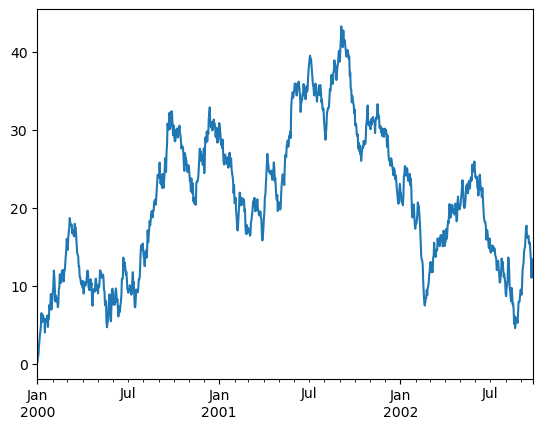

In [171]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

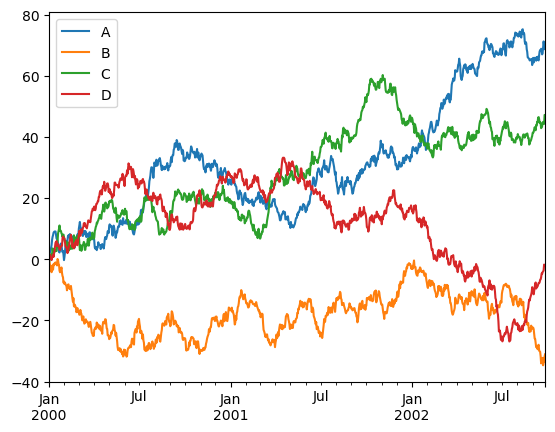

In [172]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index = ts.index, columns = ['A', 'B', 'C', 'D']
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc = 'best');

# Importing and exporting data

## CSV

In [173]:
df = pd.DataFrame(np.random.randint(0, 5, (10,  5)))
df.to_csv('foo.csv')

In [174]:
pd.read_csv('foo.csv')

,Unnamed: 0,0,1,2,3,4
0,0,4,1,1,3,4
1,1,1,0,3,4,0
2,2,3,3,0,0,3
3,3,4,3,2,2,1
4,4,4,2,4,4,2
5,5,3,2,0,4,4
6,6,0,4,0,2,3
7,7,0,4,0,4,0
8,8,1,3,1,2,0
9,9,3,4,1,3,4


## Parquet

In [175]:
df.to_parquet('foo.parquet')

In [176]:
pd.read_parquet('foo.parquet')

,0,1,2,3,4
0,4,1,1,3,4
1,1,0,3,4,0
2,3,3,0,0,3
3,4,3,2,2,1
4,4,2,4,4,2
5,3,2,0,4,4
6,0,4,0,2,3
7,0,4,0,4,0
8,1,3,1,2,0
9,3,4,1,3,4


## Excel

In [177]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [178]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,0,1,2,3,4
0,0,4,1,1,3,4
1,1,1,0,3,4,0
2,2,3,3,0,0,3
3,3,4,3,2,2,1
4,4,4,2,4,4,2
5,5,3,2,0,4,4
6,6,0,4,0,2,3
7,7,0,4,0,4,0
8,8,1,3,1,2,0
9,9,3,4,1,3,4
